In [1]:
from symbulate import *
%matplotlib inline

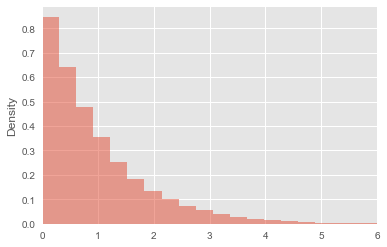

In [3]:
RV(Exponential(1)).sim(10000).plot()
plt.xlim(0, 6)
plt.show()

[Look here for more on embedding animation](http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/).  Can we incorporate any of this into our plots?

In [11]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [5]:
x = widgets.IntText(
    value=5,
    description='x:',
    disabled=False
)

n = widgets.IntText(
    value=10,
    description='n:',
    disabled=False
)

p = widgets.BoundedFloatText(
    value=0.5,
    min=0,
    max=1,
    step=0.01,
    description='p:',
    disabled=False
)

def binomial_cdf(x, n, p):
    return Binomial(n, p).cdf(x)

interact(binomial_cdf, x = x, n = n, p = p);

In [6]:
def f(x):
    return Normal(0,1).cdf(x)

interact(f, x = widgets.FloatSlider(min=-3, max=3, step=0.01, value=0));

In [7]:
def f(x):
    nsim = 10000
    return Normal(0,1).sim(nsim).count_lt(x) / nsim

interact(f, x = widgets.FloatSlider(min=-3, max=3, step=0.01, value=0));

In [8]:
def f(mu, sigma, x):
    return Normal(mu, sigma).cdf(x)

interact(f, x = widgets.FloatSlider(min=-3, max=3, step=0.01, value=0), mu = fixed(0), sigma = fixed(1));

In [9]:
def f(mu, sigma, x):
    return Normal(mu, sigma).cdf(x)

interact(f, x = widgets.FloatSlider(min=-3, max=3, step=0.01, value=0),
         mu = widgets.FloatSlider(min=-3, max=3, step=0.01, value=0),
         sigma = fixed(1));

In [10]:
P = Exponential(1)

def f(n):
    RV(P ** n, mean).sim(10000).plot(bins = 30)
    plt.show()

interact(f, n = widgets.IntSlider(min=1, max=50, step=1, value=1), continuous_update=False);

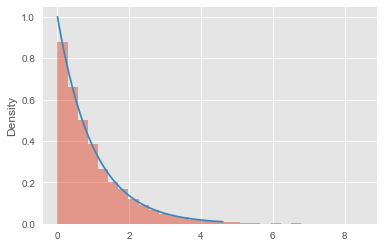

In [15]:
P = Exponential(1)

def f(n):
    RV(P ** n, mean).sim(10000).plot(bins = 30)
    Gamma(n, n).plot()
    plt.show()

interact(f, n = widgets.IntSlider(min=1, max=50, step=1, value=1), continuous_update=False);

In [11]:
#standardized
P = Exponential(1)

def f(n):
    RV(P ** n, mean).sim(10000).standardize().plot(bins = 30)
    plt.xlim(-4, 4)
    Normal(0, 1).plot()
    plt.show()

interact(f, n = widgets.IntSlider(min=1, max=50, step=1, value=1), continuous_update=False);

In [14]:
play = widgets.Play(
#     interval=10,
    value=1,
    min=1,
    max=50,
    step=1,
    description="Press play",
    disabled=False
)
slider = widgets.IntSlider()
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.HBox([play, slider])

In [13]:
P = Exponential(1)

def f(n):
    RV(P ** n, mean).sim(10000).plot(bins = 30)
    plt.show()

interact(f, n = slider, continuous_update=False);

In [13]:
#standardized - why not working?
P = Exponential(1)

def f(n):
    RV(P ** n, mean).sim(10000).standardize().plot(bins = 30)
    plt.xlim(-4, 4)
    plt.show()

interact(f, n = slider, continuous_update=False);

NameError: name 'slider' is not defined

In [15]:
def f(mu):
    Normal(mu,1).plot()
    plt.show()

interact(f, mu = widgets.FloatSlider(min=-3, max=3, step=0.01, value=0));

 - How to fix scale on plot - **standardize, use `plt.xlim()` **
 - How to get everything on one plot instead of multiple plots when slider is moved?  **use `plt.show()` **

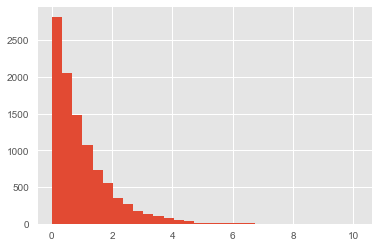

In [10]:
import matplotlib.pyplot as plt

P = Exponential(1)

def f(n):
    x = RV(P ** n, mean).sim(10000)
    plt.hist(x, bins = 30)
    plt.xlim(0, 6)
    plt.show()

interact(f, n = widgets.IntSlider(min=1, max=20, step=1, value=1));

In [16]:
P = BoxModel([-1,1], size = inf, replace = True)  # Can simulate infinitely values
Z = RV(P)
X = RandomProcess(P, TimeIndex(fs=1))

nmax = 30
X[0] =  0
for n in range(nmax):
    X[n+1] = X[n] + Z[n]

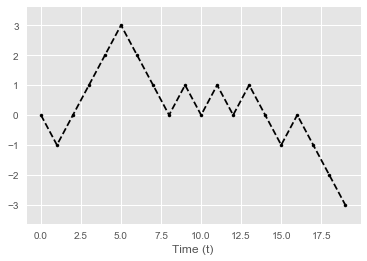

In [17]:
X.sim(1).plot(alpha = 1,tmin = 0, tmax = 20)

In [18]:
play = widgets.Play(
#     interval=10,
    value=0,
    min=0,
    max=20,
    step=1,
    description="Press play",
    disabled=False
)
slider = widgets.IntSlider()
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.HBox([play, slider])

Widget Javascript not detected.  It may not be installed or enabled properly.


In [19]:
x = X.sim(1)

def f(n):
    x.plot(alpha = 1, tmin = 0, tmax = n)
    plt.ylim(-20, 20)
    plt.xlim(0, 20)
    plt.show()

interact(f, n = slider, continuous_update=False);

Widget Javascript not detected.  It may not be installed or enabled properly.


In [20]:
play = widgets.Play(
#     interval=10,
    value=0,
    min=0,
    max=10000,
    step=1,
    description="Press play",
    disabled=False
)
slider = widgets.IntSlider()
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.HBox([play, slider])

Widget Javascript not detected.  It may not be installed or enabled properly.


In [21]:
N = PoissonProcess(1)
Nt = N.sim(1)

def f(t):
    Nt.plot(alpha = 1, tmin = 0, tmax = t / 10000 * 20)
    plt.ylim(0, 20)
    plt.xlim(0, 20)
    plt.show()

interact(f, t = slider, continuous_update=False);


Widget Javascript not detected.  It may not be installed or enabled properly.


In [ ]:
N = PoissonProcess(1)
path = N.sim(1)
Tmax = 10

for t in list(range(0, 100)):
    path.plot(alpha = 1, tmax = t / 100 * Tmax)
    plt.xlim(0, Tmax)